In [118]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats

## Load data (Chen)

In [332]:
adata = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/AuthorProcessedData/Author.raw.h5ad')

In [333]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [334]:
metadata = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/AuthorProcessedData/GSE236581_CRC-ICB_metadata.txt.gz', sep=' ')
chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P26', 'P15', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']

dict_Identifier_to_CellInfo = { tup.Index : [tup.Ident, tup.Patient, tup.Treatment, tup.Tissue, tup.MajorCellType, tup.SubCellType] for tup in metadata.itertuples() }
metadata_MSI = metadata[(metadata['Patient'].isin(chen_patient_order_by_MSI_intensity))].copy()

In [335]:
dict_AuthorCellType_to_lvl_1b_CellType = {
    'c01_CD4_Tn_CCR7' : 'CD4+ T',
    'c02_CD4_Tn_SELL' : 'CD4+ T',
    'c03_CD4_Tn_NR4A2' : 'CD4+ T',
    'c04_CD4_Tcm_ANXA1' : 'CD4+ T',
    'c05_CD4_Tcm_GPR183' : 'CD4+ T',
    'c06_CD4_Trm_HSPA1A' : 'CD4+ T',
    'c07_CD4_Th17_CTSH' : 'CD4+ T',
    'c08_CD4_Tfh_CXCL13_IL6ST' : 'CD4+ T',
    'c09_CD4_Th1_CXCL13_HAVCR2' : 'CD4+ T',
    'c10_CD4_Temra_GZMB' : 'CD4+ T',
    'c11_CD4_Treg_FOXP3' : 'CD4+ T',
    'c12_CD4_Treg_KLRB1' : 'CD4+ T',
    'c13_CD4_Treg_TNFRSF9' : 'CD4+ T',
    'c14_CD4_MT' : 'CD4+ T',
    'c15_CD8_Tn_CCR7' : 'CD8+ T',
    'c16_CD8_Tn_SELL' : 'CD8+ T',
    'c17_CD8_Tcm_GPR183' : 'CD8+ T',
    'c18_CD8_Tcm_ANXA1' : 'CD8+ T',
    'c19_CD8_Tem_CMC1' : 'CD8+ T',
    'c20_CD8_Tem_GZMK' : 'CD8+ T',
    'c21_CD8_Trm_XCL1' : 'CD8+ T',
    'c22_CD8_Trm_HSPA1B' : 'CD8+ T',
    'c23_CD8_Tex_LAYN' : 'CD8+ T',
    'c24_CD8_Temra_CX3CR1' : 'CD8+ T',
    'c25_CD8_Temra_TYROBP' : 'CD8+ T',
    'c26_CD8_MAIT_KLRB1' : 'N/A',   #! Low cell count
    'c27_CD8_MAIT_SLC4A10' : 'CD8+ T',
    'c28_CD8_IEL_CD160' : 'CD8+ T',
    'c29_T_MKI67' : 'T',
    'c30_gdT_TRDV2' : 'gd T',
    'c31_DNT' : 'T',
    'c32_DPT' : 'N/A',
    'c33_ILC_GZMK' : 'ILC',
    'c34_ILC_NR4A2' : 'ILC',
    'c35_ILC_FCGR3A' : 'N/A',   #! Low cell count   
    'c36_ILC_SYNE2' : 'N/A',    #! Low cell count
    'c37_ILC_SLC4A10' : 'ILC',
    'c38_ILC_MKI67' : 'ILC',
    'c39_NaiveB_TCL1A' : 'B',
    'c40_NaiveB_IGHD' : 'B',
    'c41_MemB_CD27' : 'B',
    'c42_MemB_GPR183' : 'B',
    'c43_GCB_LRMP' : 'B',
    'c44_GCB_MKI67' : 'B',
    'c45_PlasmaB_TXNDC5' : 'Plasma',
    'c46_PlasmaB_IGHA1' : 'Plasma',
    'c47_PlasmaB_IGHG1' : 'Plasma',
    'c48_PlasmaB_MKI67' : 'Plasma',
    'c49_Mono_CD14' : 'Monocyte',
    'c50_Mono_FCGR3A' : 'N/A',  #! Low cell count
    'c51_Mono_NFKBIZ' : 'N/A',  #! Low cell count
    'c52_Mast_TPSAB1' : 'Mast',
    'c53_Neu_CXCR2' : 'Neutrophil',
    'c54_pDC_LILRA4' : 'N/A',   #! Low cell count
    'c55_pDC_GZMB' : 'DC',
    'c56_tDC_SIGLEC6' : 'N/A',  #! Low cell count
    'c57_cDC_CLEC9A' : 'DC',
    'c58_cDC_CD1C' : 'N/A',     #! Low cell count
    'c59_cDC_IL1B' : 'DC',
    'c60_cDC_LAMP3' : 'DC',
    'c61_Mph_FCGR3A' : 'Macrophage',
    'c62_Mph_S100A8' : 'Macrophage',
    'c63_Mph_CCL20' : 'Macrophage',
    'c64_Mph_SPP1' : 'Macrophage',
    'c65_Mph_APOE' : 'Macrophage',
    'c66_Endo_LYVE1' : 'N/A',   #! Low cell count
    'c67_Endo_ACKR1' : 'Endothelial',
    'c68_Endo_FABP5' : 'Endothelial',
    'c69_Endo_CXCL12' : 'Endothelial',
    'c70_Endo_COL4A1' : 'Endothelial',
    'c71_Endo_MKI67' : 'Endothelial',
    'c72_Fibro_SOX6' : 'Fibroblast',
    'c73_Fibro_ADAMDEC1' : 'Fibroblast',
    'c74_Fibro_C7' : 'Fibroblast',
    'c75_Fibro_CCL19' : 'Fibroblast',
    'c76_Fibro_PI16' : 'N/A',   #! Low cell count
    'c77_Fibro_ACTA2' : 'Fibroblast',
    'c78_Fibro_DES' : 'N/A',    #! Low cell count
    'c79_Fibro_FAP' : 'Fibroblast',
    'c80_Fibro_MKI67' : 'Fibroblast',
    'c81_Pericyte_RGS5' : 'Pericyte',
    'c82_SMC_MYH11' : 'SMC',
    'c83_Glia_PLP1' : 'Glial',
    'c84_Coloncyte_CA2' : 'Enterocyte',
    'c85_Coloncyte_SLC26A3' : 'Enterocyte',
    'c86_Coloncyte_BEST4' : 'Enterocyte',
    'c87_Goblet_MUC2' : 'Goblet',
    'c88_EEC_PCSK1N' : 'Enteroendocrine',
    'c89_Tuft_PTGS1' : 'Tuft',
    'c90_Epi_MKI67' : 'Intestinal stem',
    'c91_Epi_Tumor' : 'Intestinal stem',
}

dict_AuthorCellType_to_lvl_2b_CellType = {
    
    'c01_CD4_Tn_CCR7' : 'CD4+ Tn',
    'c02_CD4_Tn_SELL' : 'CD4+ Tn',
    'c03_CD4_Tn_NR4A2' : 'CD4+ Tn',
    'c04_CD4_Tcm_ANXA1' : 'CD4+ Tcm',   # Central memory
    'c05_CD4_Tcm_GPR183' : 'CD4+ Tcm',  # Central memory
    'c06_CD4_Trm_HSPA1A' : 'CD4+ Trm',  # Tissue-resident memory 
    'c07_CD4_Th17_CTSH' : 'CD4+ Th17',  # Helper 17
    'c08_CD4_Tfh_CXCL13_IL6ST' : 'CD4+ Tfh', # Follicular helper
    'c09_CD4_Th1_CXCL13_HAVCR2' : 'CD4+ Th1',
    'c10_CD4_Temra_GZMB' : 'CD4+ Temra', # Effective memory re-expressing CD45RA
    'c11_CD4_Treg_FOXP3' : 'CD4+ Treg',
    'c12_CD4_Treg_KLRB1' : 'CD4+ Treg',
    'c13_CD4_Treg_TNFRSF9' : 'CD4+ Treg',
    'c14_CD4_MT' : 'CD4+ Tm',   # Memory T?
    
    'c15_CD8_Tn_CCR7' : 'CD8+ Tn',
    'c16_CD8_Tn_SELL' : 'CD8+ Tn',
    'c17_CD8_Tcm_GPR183' : 'CD8+ Tcm',
    'c18_CD8_Tcm_ANXA1' : 'CD8+ Tcm',
    'c19_CD8_Tem_CMC1' : 'CD8+ Tem',
    'c20_CD8_Tem_GZMK' : 'CD8+ Tcm',
    'c21_CD8_Trm_XCL1' : 'CD8+ Trm',
    'c22_CD8_Trm_HSPA1B' : 'CD8+ Trm',
    'c23_CD8_Tex_LAYN' : 'CD8+ Tex',
    'c24_CD8_Temra_CX3CR1' : 'CD8+ Temra',
    'c25_CD8_Temra_TYROBP' : 'CD8+ Temra',
    'c26_CD8_MAIT_KLRB1' : 'N/A',     #! Low cell count
    'c27_CD8_MAIT_SLC4A10' : 'CD8+ MAIT',
    'c28_CD8_IEL_CD160' : 'CD8+ IEL',
    'c29_T_MKI67' : 'CD8+ Proliferating T',
    'c30_gdT_TRDV2' : 'γδ2+ T',
    'c31_DNT' : 'CD4-CD8- T',
    'c32_DPT' : 'N/A',
    
    'c33_ILC_GZMK' : 'ILC',
    'c34_ILC_NR4A2' : 'ILC',
    'c35_ILC_FCGR3A' : 'N/A',   #! Low cell count
    'c36_ILC_SYNE2' : 'N/A',    #! Low cell count
    'c37_ILC_SLC4A10' : 'ILC',
    'c38_ILC_MKI67' : 'ILC',
    
    'c39_NaiveB_TCL1A' : 'Naive B',
    'c40_NaiveB_IGHD' : 'Naive B',
    'c41_MemB_CD27' : 'Memory B',
    'c42_MemB_GPR183' : 'Memory B',
    'c43_GCB_LRMP' : 'GC B',
    'c44_GCB_MKI67' : 'GC B',
    'c45_PlasmaB_TXNDC5' : 'IGHA+ Plasma',  #! Confirmed IGHA expression
    'c46_PlasmaB_IGHA1' : 'IGHA+ Plasma',   #! Confirmed IGHA expression
    'c47_PlasmaB_IGHG1' : 'IGHG+ Plasma',
    'c48_PlasmaB_MKI67' : 'IGHA+ Plasma',
    
    'c49_Mono_CD14' : 'Monocyte',
    'c50_Mono_FCGR3A' : 'N/A',  #! Low cell count
    'c51_Mono_NFKBIZ' : 'N/A',  #! Low cell count
    'c52_Mast_TPSAB1' : 'Mast',
    'c53_Neu_CXCR2' : 'Neutrophil',
    'c54_pDC_LILRA4' : 'N/A',   #! Low cell count
    'c55_pDC_GZMB' : 'pDC',
    'c56_tDC_SIGLEC6' : 'N/A',  #! Low cell count
    'c57_cDC_CLEC9A' : 'cDC',
    'c58_cDC_CD1C' : 'N/A',     #! Low cell count
    'c59_cDC_IL1B' : 'cDC',
    'c60_cDC_LAMP3' : 'cDC',
    
    'c61_Mph_FCGR3A' : 'Macrophage',
    'c62_Mph_S100A8' : 'Macrophage',
    'c63_Mph_CCL20' : 'Macrophage',
    'c64_Mph_SPP1' : 'Macrophage',
    'c65_Mph_APOE' : 'Macrophage',
    
    'c66_Endo_LYVE1' : 'N/A',   #! Low cell count
    'c67_Endo_ACKR1' : 'Endothelial',
    'c68_Endo_FABP5' : 'Endothelial',
    'c69_Endo_CXCL12' : 'Endothelial',
    'c70_Endo_COL4A1' : 'Endothelial',
    'c71_Endo_MKI67' : 'Endothelial',
    
    'c72_Fibro_SOX6' : 'Fibroblast',
    'c73_Fibro_ADAMDEC1' : 'Fibroblast',
    'c74_Fibro_C7' : 'Fibroblast',
    'c75_Fibro_CCL19' : 'Fibroblast',
    'c76_Fibro_PI16' : 'N/A',   #! Low cell count
    'c77_Fibro_ACTA2' : 'Fibroblast',
    'c78_Fibro_DES' : 'N/A',    #! Low cell count
    'c79_Fibro_FAP' : 'Fibroblast',
    'c80_Fibro_MKI67' : 'Fibroblast',
    'c81_Pericyte_RGS5' : 'Pericyte',
    'c82_SMC_MYH11' : 'SMC',
    'c83_Glia_PLP1' : 'Glial',
    
    'c84_Coloncyte_CA2' : 'Enterocyte',
    'c85_Coloncyte_SLC26A3' : 'Enterocyte',
    'c86_Coloncyte_BEST4' : 'Enterocyte',
    'c87_Goblet_MUC2' : 'Goblet',
    'c88_EEC_PCSK1N' : 'Enteroendocrine',
    'c89_Tuft_PTGS1' : 'Tuft',
    'c90_Epi_MKI67' : 'Intestinal stem',
    'c91_Epi_Tumor' : 'Intestinal stem',
}

dict_PatientID_to_MSI_class = {'SC044': 'MSI-H',
                                'CRC2783': 'MSI-I',
                                'SC035': 'MSI-I',
                                'CRC2817': 'MSI-L',


                                'P04': 'MSI-H',
                                'P21': 'MSI-H',
                                'P23': 'MSI-H',
                                
                                'P15': 'MSI-I',
                                'P19': 'MSI-I',
                                'P20': 'MSI-I',
                                'P22': 'MSI-I',
                                'P26': 'MSI-I',
                                
                                'P17': 'MSI-L',
                                'P18': 'MSI-L'}

metadata_MSI['Author_CellType_lvl_1b'] = [ dict_AuthorCellType_to_lvl_1b_CellType[AuthorCellType] for AuthorCellType in metadata_MSI['SubCellType'] ]
metadata_MSI['Author_CellType_lvl_2b'] = [ dict_AuthorCellType_to_lvl_2b_CellType[AuthorCellType] for AuthorCellType in metadata_MSI['SubCellType'] ]
metadata_MSI['MSI_class'] = [ dict_PatientID_to_MSI_class[PatientID] for PatientID in metadata_MSI['Patient'] ]

metadata2 = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/metadata/Chen_et_al.MSI.run_meta.organized.tsv', sep='\t')
metadata2['Ident'] = [ tup.SampleID.replace('P', 'CRC') for tup in metadata2.itertuples() ]
dict_Ident_to_TreatmentInfo = { Ident : edf['TreatmentStage'].iloc[0] for Ident, edf in metadata2.groupby('Ident', observed=True) }
dict_PatientID_to_Response = { tup.PatientID : tup.Response for tup in metadata2.itertuples()  }

metadata_MSI['TreatmentStage'] = [ dict_Ident_to_TreatmentInfo[Ident] for Ident in metadata_MSI['Ident'] ]
metadata_MSI.shape

(482286, 13)

In [336]:
adata_MSI = adata[adata.obs.index.isin(list(metadata_MSI.index))].copy()

adata_MSI.obs['Author_CellType_lvl_1b'] = [ dict_AuthorCellType_to_lvl_1b_CellType[sct] for sct in adata_MSI.obs['SubCellType'] ]
adata_MSI.obs['Author_CellType_lvl_2b'] = [ dict_AuthorCellType_to_lvl_2b_CellType[sct] for sct in adata_MSI.obs['SubCellType'] ]
adata_MSI.obs['TreatmentStage'] = [ dict_Ident_to_TreatmentInfo[Ident] for Ident in adata_MSI.obs['SampleIdent'] ]
adata_MSI.obs['MSI_class'] = [ dict_PatientID_to_MSI_class[PID] for PID in adata_MSI.obs['Patient'] ]
adata_MSI.obs['Response'] = [ dict_PatientID_to_Response[PID] for PID in adata_MSI.obs['Patient'] ]

In [337]:
sc.tl.score_genes(adata_MSI, score_name='Cytotoxic score', 
                  gene_list=['GNLY', 'GZMB', 'PRF1', 'CCL3', 'HAVCR2', 'CST7', 'IFNG', 'NKG7'])
# sc.tl.score_genes(adata_MSI, score_name='Cytokine score', 
#                   gene_list=['CSF3', 'IL1A', 'IL1B', 'IL1RN', 'IL1R1', 'IL1R2', 'OSM', 'PTGS2', 'TNF', 'IL6',
#                              'IL11', 'IL24', 'LIF', 'IL17C', 'IL23A', 'TNFSF15', 'GSDMB', 'GSDMD', 'RELA', 'RELB', 'SOCS3', 'CEBPB'])
# sc.tl.score_genes(adata_MSI, score_name='Chemokine score', 
#                   gene_list=['CXCL1', 'CXCL2', 'CXCL3', 'CXCL5', 'CCL20', 'SLC12A2', 'CCL3', 'CCL4', 'CXCL6', 'CXCL8', 
#                              'CXCL9', 'CXCL10', 'CXCL11'])
# sc.tl.score_genes(adata_MSI, score_name='APC score', 
#                   gene_list=['CD74', 'LCN2', 'CEACAM1', 'CEACAM5', 'CEACAM6', 'CD177', 'SECTM1', 'IFI27', 'IFITM3', 'BST2', 'IFI6', 
#                              'PSMB9', 'HLA-A', 'HLA-B', 'HLA-C', 'HLA-E', 'HLA-F', 'HLA-F-AS1', 'HLA-G', 'HLA-DMA', 'HLA-DMB', 'HLA-DOA', 
#                              'HLA-DOB', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DQA2', 'HLA-DQB1', 'HLA-DQB2', 'HLA-DRA', 'HLA-DRB1', 'HLA-DRB5', ])
sc.tl.score_genes(adata_MSI, score_name='Exhaustion score', 
                  gene_list=['CTLA4', 'HAVCR2', 'LAG3', 'TIGIT', 'PDCD1'])

In [166]:
adata_MSI

AnnData object with n_obs × n_vars = 482286 × 36027
    obs: 'SampleIdent', 'Patient', 'Treatment', 'Tissue', 'MajorCellType', 'SubCellType', 'Cytotoxic score', 'Exhaustion score', 'Cytokine score', 'Chemokine score', 'APC score', 'Author_CellType_lvl_1b', 'Author_CellType_lvl_2b', 'TreatmentStage', 'MSI_class', 'Response'
    uns: 'log1p'

<Axes: xlabel='TreatmentStage', ylabel='Exhaustion score'>

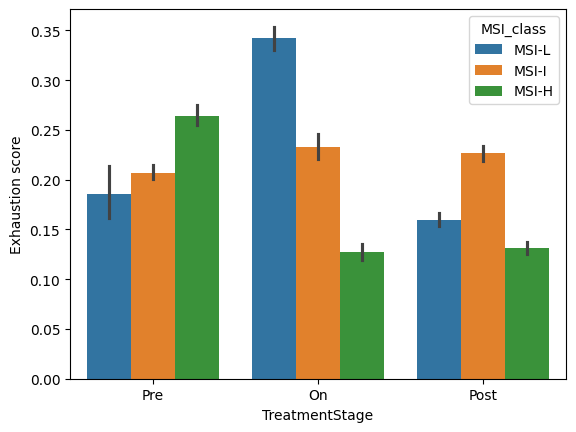

In [343]:
sns.barplot(data=adata_MSI.obs[(adata_MSI.obs['Author_CellType_lvl_1b']=='CD8+ T') & (adata_MSI.obs['Tissue']=='Tumor')], 
            x='TreatmentStage', y='Exhaustion score', order=['Pre', 'On', 'Post'],
            hue='MSI_class', hue_order=['MSI-L', 'MSI-I', 'MSI-H'], )

In [97]:
set(adata_MSI.obs['Author_CellType_lvl_1b'])

{'B',
 'CD4+ T',
 'CD8+ T',
 'DC',
 'Endothelial',
 'Enterocyte',
 'Enteroendocrine',
 'Fibroblast',
 'Glial',
 'Goblet',
 'ILC',
 'Intestinal stem',
 'Macrophage',
 'Mast',
 'Monocyte',
 'N/A',
 'Neutrophil',
 'Pericyte',
 'Plasma',
 'SMC',
 'T',
 'Tuft',
 'gd T'}

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying

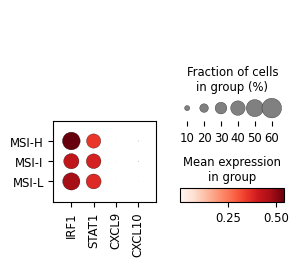

In [163]:
sc.pl.dotplot(adata_MSI[(adata_MSI.obs['Author_CellType_lvl_1b'].isin(['CD4+ T',])) & 
                        (adata_MSI.obs['TreatmentStage']=='Pre')], var_names=['IRF1', 'STAT1', 'CXCL9', 'CXCL10'], 
              groupby='MSI_class', # standard_scale='var',
              )

In [331]:
ScoreTemporalChange = list()

for Author_CellType_lvl_1b, edf in adata_MSI.obs[(adata_MSI.obs['Author_CellType_lvl_1b']=='CD8+ T') & 
                                                 (adata_MSI.obs['Tissue']=='Tumor')].groupby('Author_CellType_lvl_2b'):
    for MSI_class, edf2 in edf.groupby('MSI_class'):
        for TreatmentStage, edf3 in edf2.groupby('TreatmentStage'):
            ScoreTemporalChange.append( [Author_CellType_lvl_1b, MSI_class, TreatmentStage, np.mean(edf3['Exhaustion score'])] )

ScoreTemporalChange = pd.DataFrame(ScoreTemporalChange, columns=['CellType', 'MSI_class', 'TreatmentStage', 'Score'])
d = { 'Pre' : 0, 'On' : 1, 'Post' : 2 }
ScoreTemporalChange['int_TreatmentStage'] = [ d[TS] for TS in ScoreTemporalChange['TreatmentStage'] ]

# sns.scatterplot(data=ScoreTemporalChange[(ScoreTemporalChange['CellType'].isin(['CD8+ Tem', 'CD8+ Tcm']))], 
#                 x='int_TreatmentStage', y='Score', hue ='MSI_class', legend=None)
sns.barplot(data= [(ScoreTemporalChange['CellType'].isin(['CD8+ Tem', 'CD8+ Tcm']))], 
             x='int_TreatmentStage', y='Score', hue ='MSI_class', legend=True)

TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

<Axes: xlabel='MSI_class', ylabel='Cytotoxic score'>

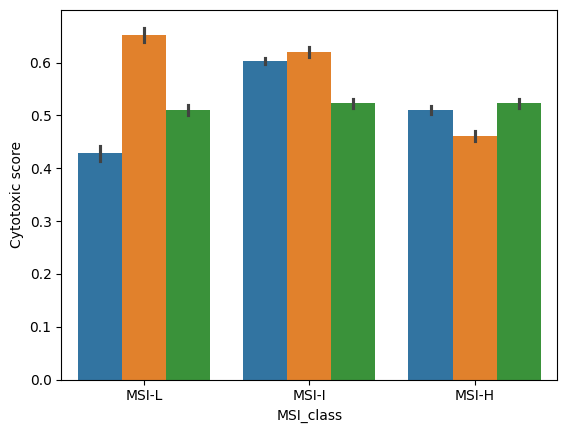

In [116]:
sns.barplot(data=adata_MSI.obs[(adata_MSI.obs['Author_CellType_lvl_1b']=='CD8+ T')], 
            x='MSI_class', y='Cytotoxic score', order=['MSI-L', 'MSI-I', 'MSI-H'],
            hue='TreatmentStage', hue_order=['Pre', 'On', 'Post'], legend=None,)

In [164]:
sc.pl.violin(adata_MSI[(adata_MSI.obs['Author_CellType_lvl_1b']=='CD8+ T') & (adata_MSI.obs['TreatmentStage']=='Pre')], 
             keys='Cytotoxic score', 
             groupby='MSI_class', order=['MSI-L', 'MSI-I', 'MSI-H'],
             
             )

,SampleIdent,Patient,Treatment,Tissue,MajorCellType,SubCellType,Cytotoxic score,Exhaustion score,Cytokine score,Chemokine score,APC score,Author_CellType_lvl_1b,Author_CellType_lvl_2b,TreatmentStage,MSI_class,Response
CRC04-N-I_AAACGGGAGCCAGAAC,CRC04-N-I,P04,I,Normal,Epi,c85_Coloncyte_SLC26A3,-0.138432,-0.050349,-0.010774,-0.068656,0.480309,Enterocyte,Enterocyte,Pre,MSI-H,CR
CRC04-N-I_AAACGGGCAAAGTGCG,CRC04-N-I,P04,I,Normal,Epi,c84_Coloncyte_CA2,-0.148057,-0.110161,-0.007751,0.018589,0.141763,Enterocyte,Enterocyte,Pre,MSI-H,CR
CRC04-N-I_AAAGATGGTGGTAACG,CRC04-N-I,P04,I,Normal,Epi,c87_Goblet_MUC2,-0.118206,-0.075999,0.019582,0.050193,0.025655,Goblet,Goblet,Pre,MSI-H,CR
CRC04-N-I_AAAGCAATCTGCTTGC,CRC04-N-I,P04,I,Normal,Epi,c84_Coloncyte_CA2,-0.102892,-0.024260,0.015719,-0.067933,-0.014256,Enterocyte,Enterocyte,Pre,MSI-H,CR
CRC04-N-I_AAATGCCAGCGATAGC,CRC04-N-I,P04,I,Normal,Epi,c84_Coloncyte_CA2,-0.118388,-0.077998,0.000832,0.156211,0.171262,Enterocyte,Enterocyte,Pre,MSI-H,CR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRC23-T-IV_TCGTAGAGTTGATTCG,CRC23-T-IV,P23,IV,Tumor,ILC,c34_ILC_NR4A2,1.054083,-0.100228,-0.031510,-0.075110,0.401819,ILC,ILC,Post,MSI-H,CR
CRC23-T-IV_TGCCAAATCCGCATAA,CRC23-T-IV,P23,IV,Tumor,ILC,c34_ILC_NR4A2,0.965724,0.168805,-0.026236,0.052257,0.360954,ILC,ILC,Post,MSI-H,CR
CRC23-T-IV_TGCGGGTGTCCAGTTA,CRC23-T-IV,P23,IV,Tumor,ILC,c34_ILC_NR4A2,0.918567,-0.059782,0.031903,-0.081520,0.400199,ILC,ILC,Post,MSI-H,CR
CRC23-T-IV_TTGACTTCATGTTGAC,CRC23-T-IV,P23,IV,Tumor,ILC,c34_ILC_NR4A2,0.121139,-0.050231,0.034738,-0.064263,0.270466,ILC,ILC,Post,MSI-H,CR


## GSEApy

In [205]:
import gseapy as gp

In [344]:
dict_PatientID_to_MSI_class = {'SC044': 'MSI-H',
                                'CRC2783': 'MSI-I',
                                'SC035': 'MSI-I',
                                'CRC2817': 'MSI-L',

                                'P04': 'MSI-H',
                                'P21': 'MSI-H',
                                'P23': 'MSI-H',
                                
                                'P15': 'MSI-I',
                                'P19': 'MSI-I',
                                'P20': 'MSI-I',
                                'P22': 'MSI-I',
                                'P26': 'MSI-I',
                                
                                'P17': 'MSI-L',
                                'P18': 'MSI-L'}

adata = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.AuthorAnnot.MSI_score_labeled.h5ad')
adata.obs['MSI_class'] = [ dict_PatientID_to_MSI_class[PatientID] for PatientID in adata.obs['PatientID'] ]

In [345]:
adata_tumor = adata[(adata.obs['BiopsySite']=='Tumor') & (adata.obs['Author_CellType_lvl_1b']!='N/A')].copy()
adata_tumor = adata_tumor.raw.to_adata()
sc.pp.normalize_total(adata_tumor)
sc.pp.log1p(adata_tumor)

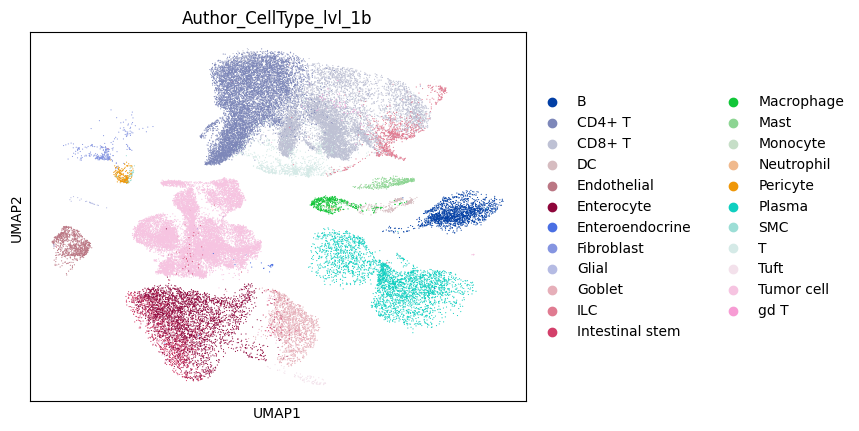

In [193]:
sc.pl.umap(adata_tumor, color=['Author_CellType_lvl_1b'])

In [346]:
sc.tl.score_genes(adata_tumor, score_name='Cytotoxic score', 
                  gene_list=['GNLY', 'GZMB', 'PRF1', 'CCL3', 'HAVCR2', 'CST7', 'IFNG', 'NKG7'])
sc.tl.score_genes(adata_tumor, score_name='Exhaustion score', 
                  gene_list=['CTLA4', 'HAVCR2', 'LAG3', 'TIGIT', 'PDCD1'])

## Genes correlated with MSI intensity

In [354]:
import glob 

CellTypeOfInterest = 'CD4+ T'
r_threshold = 0.8
p_threshold = 0.05

for PATH_E in glob.glob('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/4_TME/Chen*tsv'):
    CellType = PATH_E.split('/')[-1].split('.')[1].split('_')[0]
    if CellType == CellTypeOfInterest:
        df = pd.read_csv(PATH_E, sep='\t')
        df = df[(df['pval']<=p_threshold) & (df['r']>=r_threshold)].copy()
        break 

for gene in df['gene']:
    print(gene)

INTS11
NOL9
NUDC
TMEM222
YTHDF2
AK2
SF3A3
NFYC
DMAP1
ERI3
ACADM
CCDC18
RAP1A
SF3B4
PRPF3
SCNM1
PRCC
NCSTN
DEDD
SOAT1
TRMT1L
GPR25
PTPN7
FCMR
TRAF3IP3
RDH14
SUPT7L
SLC4A1AP
KRCC1
RPIA
ACTR3
GYPC
ERCC3
DARS
TADA3
RPUSD3
EMC3
NME6
CYB561D2
MRPL3
LSG1
TACC3
LETM1
NOP14
TBC1D1
OCIAD1
LEF1
MCUB
TIFA
PPID
IRF2
PDCD6
C5orf51
KIF2A
AK6
AGGF1
TNFAIP8
RAD50
TCERG1
RBM22
CCDC69
FAM114A2
MRPL22
TRIM27
MRPS18B
RING1
LEMD2
ZNF76
PPIL1
MRPS10
MEA1
SYNCRIP
RPF2
GINM1
HNRNPA2B1
BAZ1B
DTX2
RSBN1L
GIMAP8
GIMAP7
GIMAP4
GIMAP6
GIMAP5
NUB1
CTSB
PUF60
GPAA1
PSIP1
RABEPK
PTGES2
GTPBP4
KIN
CDC123
APBB1IP
CISD1
DNAJB12
CACUL1
TIAL1
SEC23IP
UROS
TSSC4
ZBED5
C11orf58
KBTBD4
TMEM138
SDHAF2
FEN1
GPR137
DPF2
SF3B2
AIP
LAMTOR1
ALG8
THYN1
TM7SF3
SINHCAF
RESF1
MCRS1
ATF1
DCTN2
TSFM
PPP1CC
ATP6V0A2
LINC00426
RNASEH2B
PIP4P1
ACIN1
SNX6
TRAPPC6B
ACTN1
ZC3H14
YY1
HACD3
SCAMP2
MTHFS
MESD
MPG
MRPL28
RNPS1
UQCRC2
SPNS1
CD2BP2
ATP6V0D1
KARS
DPH1
PHF23
TMEM199
ERAL1
PSMD11
MRPL45
STARD3
PSMD3
RAB5C
CBX1
UTP18
TACO1
CD79B
RAB37
N

### Hel

In [234]:
def get_GSEA_results( adata, gene_sets, min_size=15 ):
    result = adata.uns['rank_genes_groups']
    # result = adata_epi_chen_tumor.uns['rank_genes_groups']

    groups = result['names'].dtype.names
    degs = pd.DataFrame(
        {group + '_' + key: result[key][group]
        for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})
    
    pre_res = gp.prerank(degs.loc[:,['MSI-H_names', 'MSI-H_logfoldchanges']], gene_sets=gene_sets, min_size=min_size)
    return pre_res

In [276]:
adata_tumor_subset = adata_tumor[(adata_tumor.obs['Author_CellType_lvl_1b'].isin(['Monocyte', 'Macrophage'])) & 
                                 (adata_tumor.obs['MSI_class']!='MSI-I')].copy()

In [281]:
sc.tl.rank_genes_groups(adata_tumor_subset, groupby='MSI_class', method='wilcoxon')

In [317]:
Chen_GSEA_GO_Molecular_Function_2023_out = get_GSEA_results( adata_tumor_subset, 'GO_Molecular_Function_2023' )

2025-04-03 21:50:08,674 [WARNING] Duplicated values found in preranked stats: 48.41% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [318]:
Chen_GSEA_GO_Molecular_Function_2023_out.res2d['GO'] = [ Term.split(' ')[-1][1:-1] for Term in Chen_GSEA_GO_Molecular_Function_2023_out.res2d['Term'] ]
Chen_GSEA_GO_Molecular_Function_2023_out.res2d[(Chen_GSEA_GO_Molecular_Function_2023_out.res2d['GO']=='GO:0002863')]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,GO


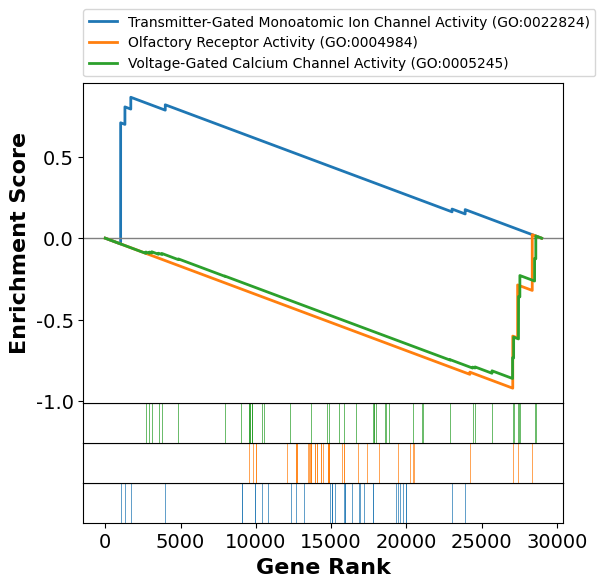

In [319]:
Chen_GSEA_GO_Molecular_Function_2023_out_significant = Chen_GSEA_GO_Molecular_Function_2023_out.res2d[(Chen_GSEA_GO_Molecular_Function_2023_out.res2d['NOM p-val']<=1) & 
                                                                                      (Chen_GSEA_GO_Molecular_Function_2023_out.res2d['FDR q-val']<=0.25)]

ax = Chen_GSEA_GO_Molecular_Function_2023_out.plot(terms=list(Chen_GSEA_GO_Molecular_Function_2023_out_significant['Term']), show_ranking=False, )
# a = set(Chen_GSEA_GO_Molecular_Function_2023_out_significant.iloc[0].Lead_genes.split(';'))
# b = set(Chen_GSEA_GO_Molecular_Function_2023_out_significant.iloc[1].Lead_genes.split(';'))
# a.intersection(b)

In [13]:
sc.tl.score_genes(adata_tumor, score_name='Cytotoxic score', 
                  gene_list=['GNLY', 'GZMB', 'PRF1', 'CCL3', 'HAVCR2', 'CST7', 'IFNG', 'NKG7'])
sc.tl.score_genes(adata_tumor, score_name='Exhaustion score', 
                  gene_list=['CTLA', 'HAVCR2', 'LAG3', 'TIGIT', 'PDCD1'])
sc.tl.score_genes(adata_tumor, score_name='Cytokine score', 
                  gene_list=['CSF3', 'IL1A', 'IL1B', 'IL1RN', 'IL1R1', 'IL1R2', 'OSM', 'PTGS2', 'TNF', 'IL6',
                             'IL11', 'IL24', 'LIF', 'IL17C', 'IL23A', 'TNFSF15', 'GSDMB', 'GSDMD', 'RELA', 'RELB', 'SOCS3', 'CEBPB'])
sc.tl.score_genes(adata_tumor, score_name='Chemokine score', 
                  gene_list=['CXCL1', 'CXCL2', 'CXCL3', 'CXCL5', 'CCL20', 'SLC12A2', 'CCL3', 'CCL3L3', 'CCL4', 'CXCL6', 'CXCL8', 
                             'CXCL9', 'CXCL10', 'CXCL11'])

sc.tl.score_genes(adata_tumor, score_name='APC score', 
                  gene_list=['CD74', 'LCN2', 'CEACAM1', 'CEACAM5', 'CEACAM6', 'CD177', 'SECTM1', 'IFI27', 'IFITM3', 'BST2', 'IFI6', 
                             'PSMB9', 'HLA-A', 'HLA-B', 'HLA-C', 'HLA-E', 'HLA-F', 'HLA-F-AS1', 'HLA-G', 'HLA-DMA', 'HLA-DMB', 'HLA-DOA', 
                             'HLA-DOB', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DQA2', 'HLA-DQB1', 'HLA-DQB2', 'HLA-DRA', 'HLA-DRB1', 'HLA-DRB5', ])

In [35]:
for ct in sorted(set(adata_tumor.obs['Author_CellType_lvl_2b'])):
    if 'CD8+' in ct:
        print(f'\'{ct}\'', end=', ')
    # if 'CD4+' in ct:
    #     print(f'\'{ct}\'', end=', ')
    

'CD8+ IEL', 'CD8+ MAIT', 'CD8+ Proliferating T', 'CD8+ Tcm', 'CD8+ Tem', 'CD8+ Temra', 'CD8+ Tex', 'CD8+ Tn', 'CD8+ Trm', 

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


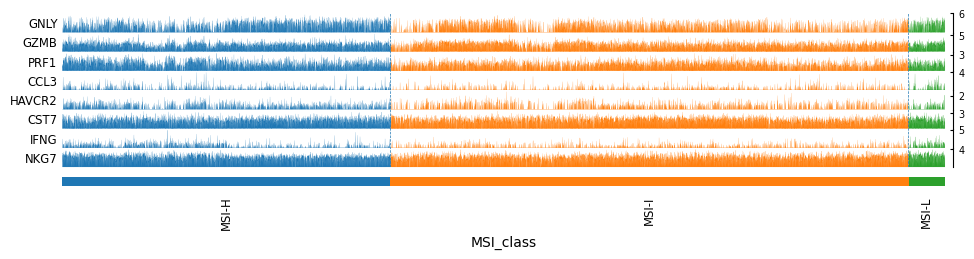

In [45]:
sc.pl.tracksplot(adata_tumor[(adata_tumor.obs['Author_CellType_lvl_2b'].isin(['CD8+ IEL', 'CD8+ MAIT', 'CD8+ Proliferating T', 
                                                                           'CD8+ Tcm', 'CD8+ Tem', 'CD8+ Temra', 'CD8+ Tex', 'CD8+ Tn', 'CD8+ Trm', ]))],
              var_names=['GNLY', 'GZMB', 'PRF1', 'CCL3', 'HAVCR2', 'CST7', 'IFNG', 'NKG7'], groupby='MSI_class',
              standard_scale='var', cmap="RdBu_r",swap_axes=True,
              )

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


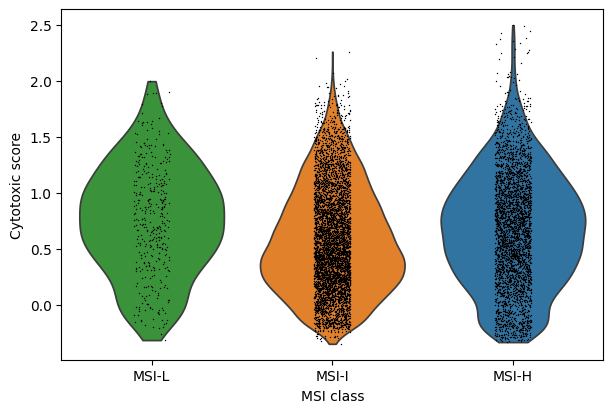

In [46]:
sc.pl.violin(adata_tumor[(adata_tumor.obs['Author_CellType_lvl_2b'].isin([
    'CD8+ IEL', 'CD8+ MAIT', 'CD8+ Proliferating T', 'CD8+ Tcm',
    'CD8+ Tem', 'CD8+ Temra', 'CD8+ Tex', 'CD8+ Tn', 'CD8+ Trm', 
    ]))], keys='Cytotoxic score', groupby='MSI_class', order=['MSI-L', 'MSI-I', 'MSI-H'])

In [26]:
x = adata_tumor[(adata_tumor.obs['Author_CellType_lvl_2b'].isin([
    'CD8+ IEL', 'CD8+ MAIT', 'CD8+ Proliferating T', 'CD8+ Tcm',
    'CD8+ Tem', 'CD8+ Temra', 'CD8+ Tex', 'CD8+ Tn', 'CD8+ Trm', 
    ])) & (adata_tumor.obs['MSI_class']=='MSI-L')].obs['Cytotoxic score']

y = adata_tumor[(adata_tumor.obs['Author_CellType_lvl_2b'].isin([
    'CD8+ IEL', 'CD8+ MAIT', 'CD8+ Proliferating T', 'CD8+ Tcm',
    'CD8+ Tem', 'CD8+ Temra', 'CD8+ Tex', 'CD8+ Tn', 'CD8+ Trm', 
    ])) & (adata_tumor.obs['MSI_class']=='MSI-H')].obs['Cytotoxic score']

scipy.stats.mannwhitneyu( x, y )

MannwhitneyuResult(statistic=791899.0, pvalue=0.0007378440923586113)

<Axes: xlabel='MSI_class', ylabel='Chemokine score'>

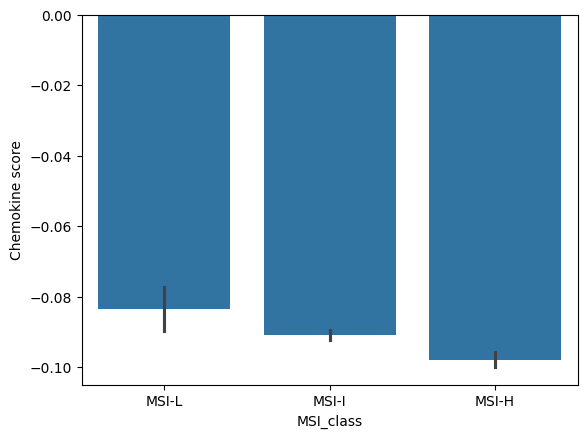

In [34]:
sns.barplot(data=adata_tumor[(adata_tumor.obs['Author_CellType_lvl_2b'].isin([
'CD4+ Tcm', 'CD4+ Temra', 'CD4+ Tfh', 'CD4+ Th1', 'CD4+ Th17', 'CD4+ Tm', 'CD4+ Tn', 'CD4+ Treg', 'CD4+ Trm', 

    ]))].obs, y='Chemokine score', x='MSI_class', order=['MSI-L', 'MSI-I', 'MSI-H'])